# Morphological Operations
Morphological operations modify object structures in an image using a structuring element.

## Basic Operations
- **Erosion** – shrinks objects by removing boundary pixels:  
  <br>
  <div align="center">
    $ A \ominus B $
  </div>
  <br>
  
  ![Erosion](https://towardsdatascience.com/wp-content/uploads/2022/03/16i7JdXdnKVjkNA1pH3xZ0g-1024x396.png)
  <br><br>

- **Dilation** – expands objects by adding boundary pixels:  
  <br>
  <div align="center">
    $ A \oplus B $
  </div>
  <br>
  
  ![Dilation](https://towardsdatascience.com/wp-content/uploads/2022/03/1GcufLGivTUHf-wDic2GeVw-1024x393.png)
  <br><br>

- **Opening** – erosion followed by dilation:
  <br>
  <div align="center">
    $ A \circ B = (A \ominus B) \oplus B $
  </div>
  <br>

- **Closing** – dilation followed by erosion:
  <br>
  <div align="center">
    $ A \bullet B = (A \oplus B) \ominus B $
  </div>
  <br>
  
  ![Dilation](https://towardsdatascience.com/wp-content/uploads/2022/03/1YDeccRxRQsvSCx4eSmKqFw-1024x793.png)
  <br><br>

**Note:**  
Visit the [Mathematical morphology on Wikipedia](https://en.wikipedia.org/wiki/Mathematical_morphology) or [DataScience](https://towardsdatascience.com/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756) for more details.

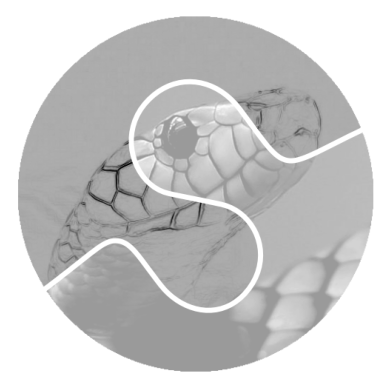

In [1]:
from PIL import Image
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale (and then to numpy array)
img = Image.fromarray(data.logo())
img_gray = np.array(img.convert('L'))

# Display the image
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show()

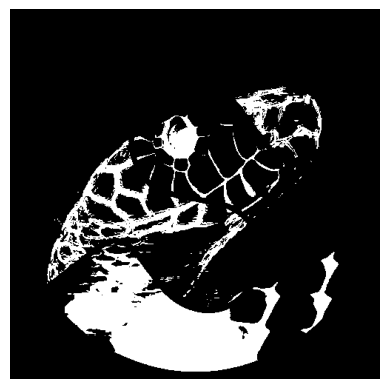

In [2]:
# create segmentation mask using a threshold
mask = img_gray < 160

# Display the image
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

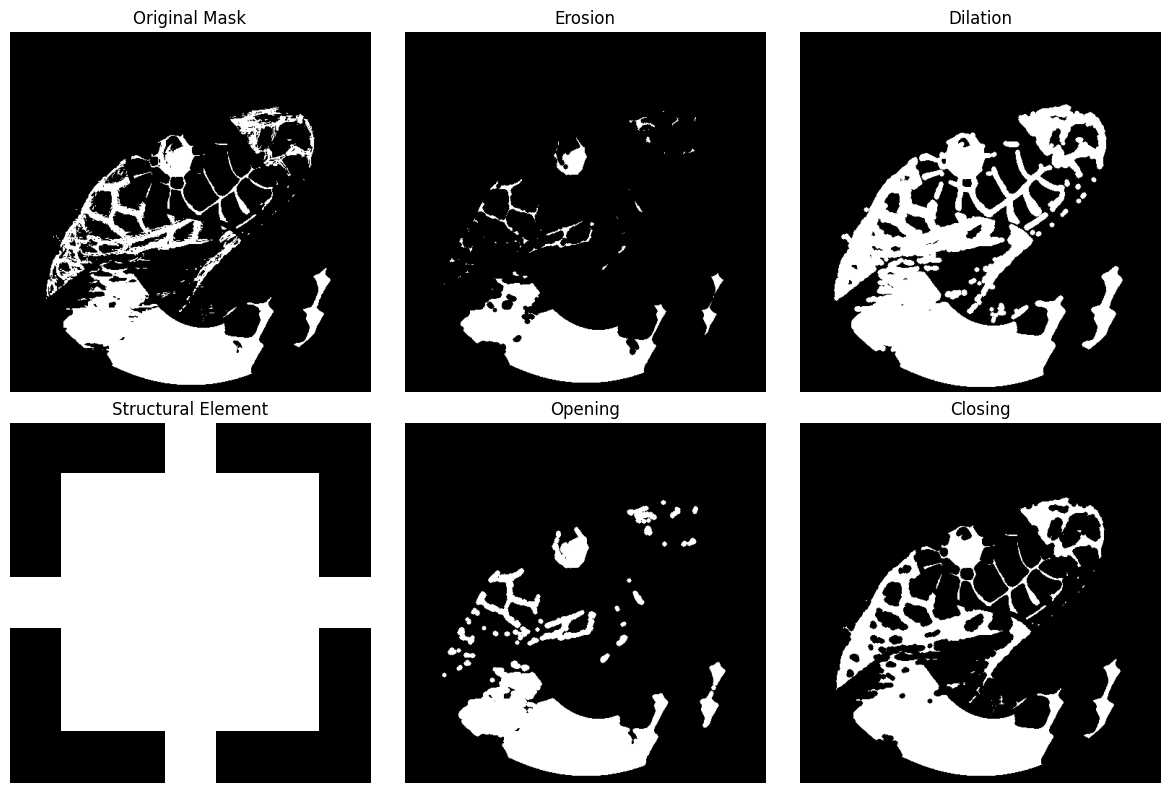

In [3]:
from skimage import morphology

# Define structuring element (kernel)
selem = morphology.disk(3)

# Apply erosion, dilation, opening, and closing
eroded = morphology.erosion(mask, selem)
dilated = morphology.dilation(mask, selem)
opened = morphology.opening(mask, selem)
closed = morphology.closing(mask, selem)

# Plot original mask, erosion, dilation, kernel, opening, and closing
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

titles = [['Original Mask', 'Erosion', 'Dilation'],
          ['Structural Element', 'Opening', 'Closing']]
images = [[mask, eroded, dilated],
          [selem, opened, closed]]

for i in range(2):
    for ax, img, title in zip(axes[i], images[i], titles[i]):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

plt.tight_layout()

### Coin Counting (Individual Work)

**Objective:**
**Count the number of coins** in an image using your knowledge of image processing techniques.

**Instructions of one possible approach:**
1. Preprocess the image if needed to enhance the objects.
2. Create a **binary mask** of the coins, e.g., by thresholding.
3. If necessary, use **morphological operations** to refine the mask (e.g., remove noise, close gaps).
4. Label connected components using:
   ```python
   labeled_mask, num_coins = measure.label(refined_mask, return_num=True)
   ```
5. Display the original image, binary mask, refined mask, and labeled components.

#### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

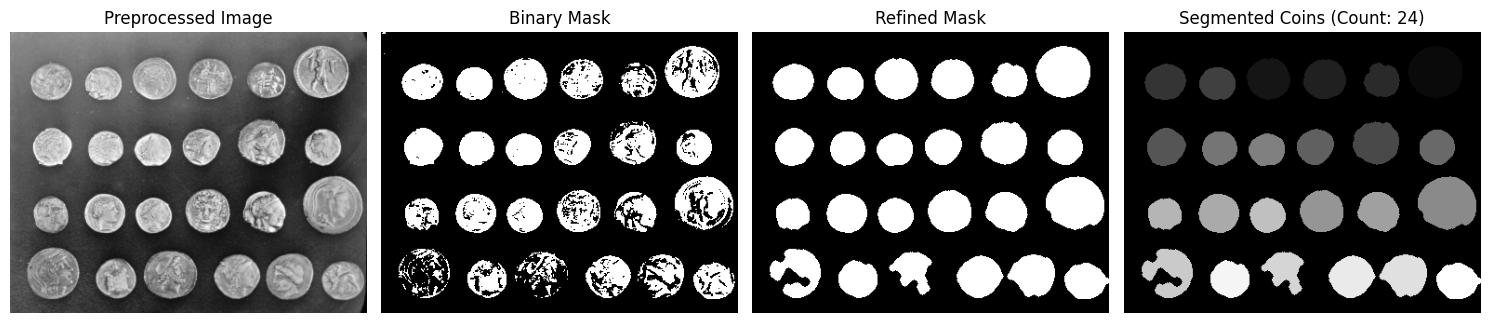

Detected coins: 24


In [4]:
from skimage import filters, measure

# Load grayscale image
img_gray = data.coins()

# Segment objects
# - The complete code will be provided during the exercise
binary_mask = None
refined_mask = None

# Label connected components (count objects)
labeled_mask, num_coins = measure.label(refined_mask, return_num=True)

# Plot results
# - The complete code will be provided during the exercise

# Print result
print(f'Detected coins: {num_coins}')

## Skeletonization
- Reduces objects in a binary image to **thin centerlines** while preserving topology.
- It may be constructed using **maximally inscribed circles**, each touching **at least two** object **edges**.
  <br><br>
  ![Skeletonization](https://www.inf.u-szeged.hu/~palagyi/skel/skeltouch.gif)


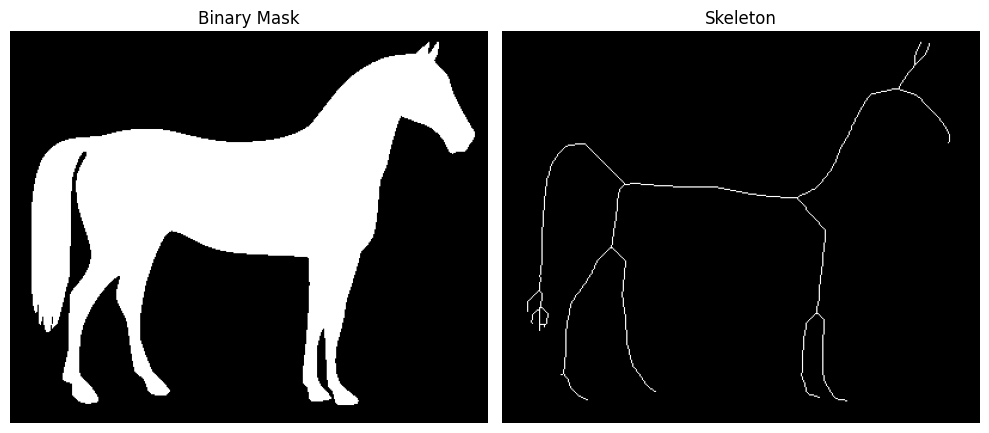

In [5]:
# Load the horse image - already a binary mask (False = object, True = background)
binary_mask = ~data.horse() # '~' is bitwise negation operator, i.e., complement

# Perform skeletonization
skeleton = morphology.skeletonize(binary_mask)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, img, title in zip(axes, [binary_mask, skeleton], ['Binary Mask', 'Skeleton']):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

### Noise Removal & Skeletonization (Individual Work)

**Objective:**
**Remove noise** from an image using **morphological operations** and then **extract** its **skeleton**, while **preserving the structure** of the object in the image as much as possible.

**Instructions:**
1. Load the following image:
   ```python
   import imageio
   img = imageio.v3.imread("https://raw.githubusercontent.com/zeleznyt/ZDO/main/dog.png")
   ```
2. Preprocess the image and use the morphological operations to **remove noise** while **preserving the object**.
3. Display original image, binary mask, denoised binary mask, and skeletonized image.

#### Code (scroll down)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

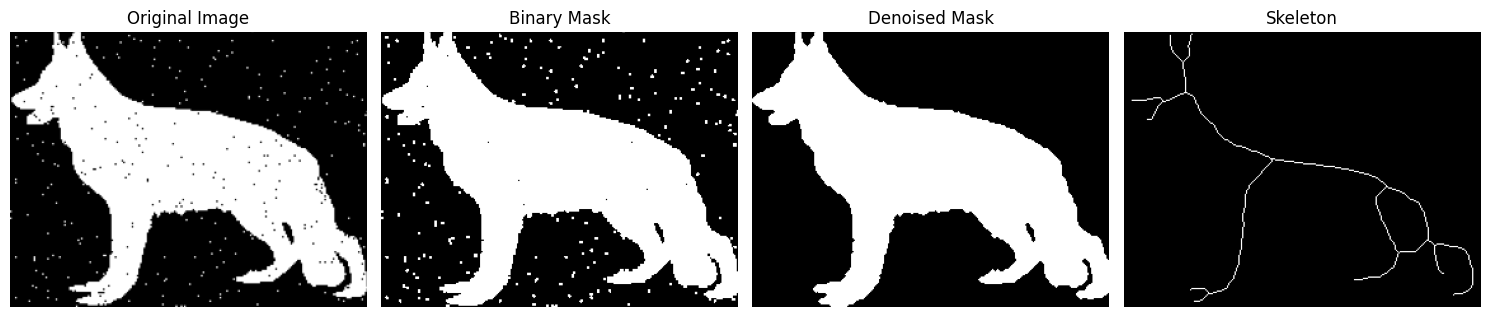

In [6]:
import imageio

# Load the image
img_url = "https://raw.githubusercontent.com/zeleznyt/ZDO/main/dog.png"
img = imageio.v3.imread(img_url)

# The complete code will be provided during the exercise
img_gray = None
binary_mask = None
denoised_mask = None
skeleton = None